## Observations and Insights 

1. Referencing the summary table - Capomulin and Ramicane are the most effective drugs are lowering tumour volume.
2. Our "final weights" analysis also reflect our summary table finds - we also see the IQR for Capomulin and Ramicane notbly smaller than the other two drugs meaning that Capomulin and Ramicane more consistently lowered the tumour volumes.
3. There is a postitive correlation between mouse weight and tumour volume. May suggest we need to control for that variable (weight) when looking at causation. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_complete = pd.merge(mouse_metadata,study_results, on = 'Mouse ID' )

# Display the data table for preview

study_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(study_data_complete['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = study_data_complete[study_data_complete[['Mouse ID','Timepoint']].duplicated()]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_data_complete[study_data_complete['Mouse ID'] != 'g989']

In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_data = clean_df.groupby('Drug Regimen')

tumor_volume_mean = grouped_data['Tumor Volume (mm3)'].mean()
tumor_volume_median = grouped_data['Tumor Volume (mm3)'].median()
tumor_volume_sd = grouped_data['Tumor Volume (mm3)'].std()
tumor_volume_sem = grouped_data['Tumor Volume (mm3)'].sem()


tumor_volume_summary_stat_df = pd.DataFrame({
    'mean' : tumor_volume_mean,
    'median' : tumor_volume_median,
    'std' : tumor_volume_sd,
    'sem' : tumor_volume_sem
})


tumor_volume_summary_stat_df

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_summary_stat_df_alt = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median','std','sem'])
tumor_volume_summary_stat_df_alt

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of measurements')

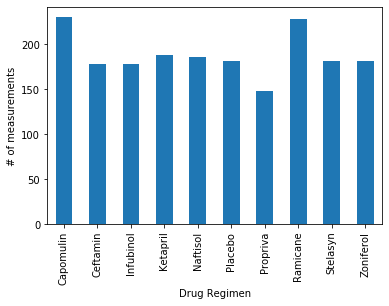

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
by_drugs = clean_df.groupby('Drug Regimen').count()

count_drugs = by_drugs.iloc[:,0]

plot = count_drugs.plot(kind = 'bar')
plot.set_ylabel('# of measurements')

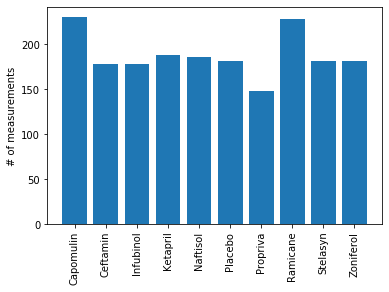

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

by_drugs = clean_df.groupby('Drug Regimen').count()

count_drugs = by_drugs.iloc[:,1]
drugs =  by_drugs.index

plt.bar(drugs,count_drugs)
plt.xticks(rotation='vertical')
plt.ylabel('# of measurements')

plt.show()

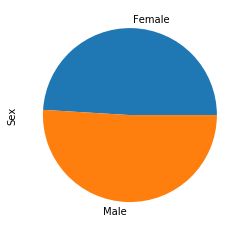

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
by_sex = clean_df.groupby('Sex')

count_sex = by_sex['Sex'].count()

count_sex.plot(kind = 'pie')

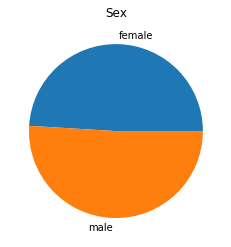

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts().sort_values()
sex_labels = ['female','male']

plt.pie(sex_counts, labels = sex_labels)
plt.title('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_max_df = clean_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_max_df,clean_df, how = 'left', on = ['Mouse ID','Timepoint'])
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [13]:
# Calculate the IQR and quantitatively  across all four treatments to determine if there are any potential outliers. 

quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("ACROSS ALL FOUR DRUGS:\n")
print(f"The lower quartile: {round(lowerq,2)}")
print(f"The upper quartile: {round(upperq,2)}")
print(f"The interquartile range: {round(iqr,2)}")
print(f"The the median: {round(quartiles[0.5],2)} \n")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.\n")

min_val = merged_df['Tumor Volume (mm3)'].min()
max_val = merged_df['Tumor Volume (mm3)'].max()
print(f'The minimum value wihtin this set is {round(min_val,2)}.')
print(f'The maximum value wihtin this set is {round(max_val,2)}.\n')

print(f'Thus there are no outliers in the set.')

ACROSS ALL FOUR DRUGS:

The lower quartile: 45.88
The upper quartile: 65.05
The interquartile range: 19.18
The the median: 55.79 

Values below 17.11 could be outliers.
Values above 93.82 could be outliers.

The minimum value wihtin this set is 22.05.
The maximum value wihtin this set is 78.57.

Thus there are no outliers in the set.


In [14]:
# Now do the same for each treament
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

final_t_vol = []

print("FOR EACH DRUG:\n")

for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    t_vol_df = merged_df.loc[merged_df['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    final_t_vol.append(t_vol_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = t_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = t_vol_df[(t_vol_df < lower_bound)|(t_vol_df > upper_bound)]
    
    #print results

    print(f"{treatment}:")

    print(f"Lower quartile: {round(lowerq,2)}")
    print(f"Upper quartile: {round(upperq,2)}")
    print(f"Interquartile range: {round(iqr,2)}")

    print(f"Values below {round(lower_bound,2)} and above {round(upper_bound,2)} are outliers.")

    if len(outliers) == 0:
        print("There are no outliers in this group.")
    else:
        print(f"Below is the list of outliers:")
        print(outliers)

    print(f'\n')

FOR EACH DRUG:

Capomulin:
Lower quartile: 32.38
Upper quartile: 40.16
Interquartile range: 7.78
Values below 20.7 and above 51.83 are outliers.
There are no outliers in this group.


Ramicane:
Lower quartile: 31.56
Upper quartile: 40.66
Interquartile range: 9.1
Values below 17.91 and above 54.31 are outliers.
There are no outliers in this group.


Infubinol:
Lower quartile: 54.05
Upper quartile: 65.53
Interquartile range: 11.48
Values below 36.83 and above 82.74 are outliers.
Below is the list of outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64


Ceftamin:
Lower quartile: 48.72
Upper quartile: 64.3
Interquartile range: 15.58
Values below 25.36 and above 87.67 are outliers.
There are no outliers in this group.




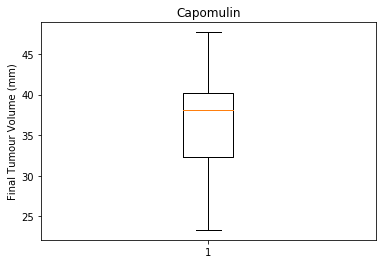

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_square = dict(markerfacecolor='r', marker='s')

for i in np.arange(4):
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'{treatments[i]}')
    ax1.set_ylabel('Final Tumour Volume (mm)')
    ax1.boxplot(final_t_vol[i],flierprops = red_square)
    
plt.show()

## Line and Scatter Plots

Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
#subset DF to only mice treated with Capomulin
cap_only = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

In [ ]:
#generate list of mice IDs in this subset
mice_cap = cap_only['Mouse ID'].unique()
mice_cap

In [ ]:
#take one mouse ID from the above list and create line graph
mouse_cap = clean_df[clean_df['Mouse ID'] == mice_cap[0]]

time = mouse_cap['Timepoint']
tumor_vol = mouse_cap['Tumor Volume (mm3)']

tumor_size, = plt.plot(time, tumor_vol)

plt.title('Mouse treated by Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_t_vol = cap_only.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = cap_only.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight,average_t_vol)

plt.title('Across all mice treated by Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient 
grouped_cap_only = cap_only.groupby('Mouse ID').mean()
corr = st.pearsonr(grouped_cap_only['Weight (g)'],grouped_cap_only['Tumor Volume (mm3)'])
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(corr[0],2)}.")

In [ ]:
# Calculate the linear regression model and plot
x_values = grouped_cap_only['Weight (g)']
y_values = grouped_cap_only['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Capomulin Treatment")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The r-squared is: {rvalue**2}")